In [2]:
# Import the packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from glob import glob 

from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
# Set the seed and create random number generator object
seed = 42
rng = np.random.RandomState(seed)

### Explore the data

In [4]:
# Set the image path
path="./../../CV101/datasets/male_vs_female_classification/"
imagePath = path+"images/"
#imageName = "1.jpg";
#myimage = imagePath + imageName

### Load all the images in 'glob' object and fetch an image randomly

### Load the Train and Test dataframe 

In [5]:
train = pd.read_csv(path+"train.csv")

In [6]:
train.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [7]:
#train['class'].value_counts()
y = train['class'].values

In [8]:
X = []
for img_name in train['image_names']:
    img = plt.imread(imagePath + img_name)
    X.append(img)

In [9]:
X = np.array(X)
X.shape

(12196, 224, 224, 3)

In [10]:
X[1:5][2][1][2]

array([50, 48, 53], dtype=uint8)

In [11]:
X = X.reshape(12196, 224 * 224 * 3)
X.shape

(12196, 150528)

In [12]:
X.shape

(12196, 150528)

### Split the data

In [13]:
X_train ,X_test, y_train , y_test = train_test_split( X, y,test_size=0.3, random_state=seed)

### Create the Model

In [14]:
model = Sequential()

In [15]:
model.add(Dense(100, input_dim = 224 * 224 * 3, activation='sigmoid'))
model.add(Dense(units = 1, activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [18]:
model.fit(X_train,y_train,epochs=10,batch_size=120,validation_data=(X_train,y_train))

Train on 8537 samples, validate on 8537 samples
Epoch 1/10
8537/8537 [==============================] - 14s 2ms/step - loss: 0.6958 - acc: 0.4944 - val_loss: 0.6936 - val_acc: 0.5013
Epoch 2/10
8537/8537 [==============================] - 13s 2ms/step - loss: 0.6932 - acc: 0.5084 - val_loss: 0.6939 - val_acc: 0.5023
Epoch 3/10
8537/8537 [==============================] - 12s 1ms/step - loss: 0.6935 - acc: 0.5030 - val_loss: 0.6942 - val_acc: 0.5023
Epoch 4/10
8537/8537 [==============================] - 13s 1ms/step - loss: 0.6936 - acc: 0.4957 - val_loss: 0.6932 - val_acc: 0.4976
Epoch 5/10
8537/8537 [==============================] - 13s 1ms/step - loss: 0.6934 - acc: 0.4947 - val_loss: 0.6947 - val_acc: 0.4978
Epoch 6/10
8537/8537 [==============================] - 15s 2ms/step - loss: 0.6934 - acc: 0.4994 - val_loss: 0.6933 - val_acc: 0.5023
Epoch 7/10
8537/8537 [==============================] - 13s 2ms/step - loss: 0.6935 - acc: 0.4905 - val_loss: 0.6932 - val_acc: 0.5024
Epoch 8

### View the results of the sample data

In [20]:
data= train

54 % sure that it is female
Whereas actual class is  0


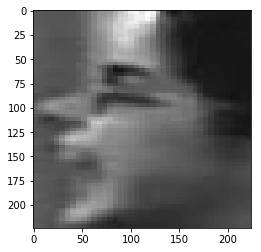

In [22]:
# get predictions
predictions = model.predict_classes(X_train)[:, 0]
prediction_probabilities = model.predict(X_train)[:, 0]

# pull out the original images from the data
# which correspond to the validation data
_, test_gender, _, test_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(test_vehicles)))

# get the corresponding image name and probability
img_name = test_gender[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread(imagePath + img_name)

# print probability and actual class
print(prob , '% sure that it is female')
print('Whereas actual class is ', test_y[index])

# plot image
plt.imshow(img)

## Train the mode by changing the hyper parameters

#### Model 2

In [23]:
model.add(Dense(100, input_dim = 224 * 224 * 3, activation='tanh'))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units = 1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,batch_size=120,validation_data=(X_train,y_train))

Train on 8537 samples, validate on 8537 samples
Epoch 1/10
8537/8537 [==============================] - 16s 2ms/step - loss: 0.6951 - acc: 0.5074 - val_loss: 0.7017 - val_acc: 0.4978
Epoch 2/10
8537/8537 [==============================] - 14s 2ms/step - loss: 0.6938 - acc: 0.5074 - val_loss: 0.6933 - val_acc: 0.5022
Epoch 3/10
8537/8537 [==============================] - 14s 2ms/step - loss: 0.6948 - acc: 0.5043 - val_loss: 0.6937 - val_acc: 0.5022
Epoch 4/10
8537/8537 [==============================] - 14s 2ms/step - loss: 0.6966 - acc: 0.4866 - val_loss: 0.6936 - val_acc: 0.5022
Epoch 5/10
8537/8537 [==============================] - 14s 2ms/step - loss: 0.6947 - acc: 0.5046 - val_loss: 0.6931 - val_acc: 0.5022
Epoch 6/10
8537/8537 [==============================] - 14s 2ms/step - loss: 0.6954 - acc: 0.5018 - val_loss: 0.7118 - val_acc: 0.4978
Epoch 7/10
8537/8537 [==============================] - 14s 2ms/step - loss: 0.6951 - acc: 0.5024 - val_loss: 0.7110 - val_acc: 0.5022
Epoch 8

### Model 2

In [24]:
pmodel.add(Dense(100, input_dim = 224 * 224 * 3, activation='tanh'))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units = 1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,batch_size=120,validation_data=(X_train,y_train))

Train on 8537 samples, validate on 8537 samples
Epoch 1/10
8537/8537 [==============================] - 21s 3ms/step - loss: 0.6980 - acc: 0.5094 - val_loss: 0.6984 - val_acc: 0.5022
Epoch 2/10
8537/8537 [==============================] - 20s 2ms/step - loss: 0.6963 - acc: 0.4991 - val_loss: 0.6932 - val_acc: 0.4978
Epoch 3/10
8537/8537 [==============================] - 20s 2ms/step - loss: 0.6982 - acc: 0.4940 - val_loss: 0.7069 - val_acc: 0.5022
Epoch 4/10
8537/8537 [==============================] - 20s 2ms/step - loss: 0.6973 - acc: 0.4994 - val_loss: 0.6952 - val_acc: 0.5022
Epoch 5/10
8537/8537 [==============================] - 20s 2ms/step - loss: 0.7002 - acc: 0.5009 - val_loss: 0.6955 - val_acc: 0.5022
Epoch 6/10
8537/8537 [==============================] - 20s 2ms/step - loss: 0.6997 - acc: 0.4985 - val_loss: 0.7007 - val_acc: 0.4978
Epoch 7/10
8537/8537 [==============================] - 20s 2ms/step - loss: 0.6973 - acc: 0.4960 - val_loss: 0.7350 - val_acc: 0.4978
Epoch 8

In [ ]:
predictions = model.predict_classes(X_test)[:,0]

In [ ]:
predictions==1
prediction_probabilities

In [12]:
%who

X	 X2	 imagePath	 img	 img_name	 np	 path	 pd	 plt	 



In [43]:
X2=X[2:3]/255
X2[:][:].dtype



dtype('float64')

In [45]:
from sys import getsizeof
print(getsizeof(X))
print(getsizeof(X2))

112
1204336
